# Makine Öğrenmesi

* Makine öğrenimi, bilgisayarların algılayıcı verisi ya da veritabanları gibi veri türlerine dayalı öğrenimini olanaklı kılan algoritmaların tasarım ve geliştirme süreçlerini konu edinen bir bilim dalıdır.
* Makine öğrenimi araştırmalarının odaklandığı konu bilgisayarlara karmaşık örüntüleri algılama ve veriye dayalı akıcı kararlar verebilme becerisi kazandırmaktadır.
* Bu, makine öğreniminin istatistik, olasılık kuramı, veri madenciliği, örüntü tanıma, yapay zeka, uyarlamalı denetim ve kuramsal bilgisayar bilimi gibi alanlarla yakından ilintili olduğunu göstermektedir.
* Makine öğrenimi ve derin öğrenmenin günümüzde pek çok farklı kullanım alanı olduğunu biliyoruz. Bu iki çalışma alanı otomotiv, tıp, eğlence, pazarlama, konuşma tanıma teknolojileri gibi farklı alanlarda kendine yer edinmiş durumda.
* Makine öğrenimi algoritmaları hedeflenen sonuca göre birkaç sınıfa ayrılabilmektedir:
    1. Gözetimli Öğrenme: Girdileri hedef çıktılara eşleyen bir işlev üretir.
    2. Gözetimsiz Öğrenme: Bir girdi kümesi modeller.
    3. Pekiştirmeli Öğrenme: Dünya algısına dayalı bir öğrenme biçimidir. Her eylem ortamda bir etki oluşturmakta ve ortam, öğrenme algoritmasına yol gösteren ödüller biçiminde dönütler vermektedir.

## Regresyon

* Regresyon analizi, iki ya da daha çok değişken arasındaki ilişkiyi ölçmek için kullanılan analiz metodudur. Eğer tek bir değişken kullanılarak analiz yapılıyorsa bunu tek değişkenli regresyon, birden çok değişken kullanılıyorsa çok değişkenli regresyon analizi olarak isimlendirilir.
* Örneğin, bir makina mühendisi basınç ve sıcaklık ve bir eğitimci öğrencilerin çalışma süreleri ve başarı dereceleri arasındaki ilişkiyi bilmek isteyebilir. Regresyon, iki(ya da daha çok) değişken arasındaki doğrusal ilişkinin fonksiyonel şeklini, biri bağımlı diğeri bağımsız değişken olarak bir doğru denklemi göstermekle kalmaz, değişkenlerden birinin değeri bilindiğinde diğeri hakkında kestirim yapılmasını sağlar. Genellikle bu iki(veya çok) değişkenlerin hepsinin niceliksel ölçekli olması zorunluluğu vardır.
* Gözetimli öğrenme yöntemlerindendir.

## 1) Basit Doğrusal Regresyon

* Basit doğrusal regresyon, iki değişken arasındaki ilişkiyi tanımlamak için kullanılan doğrusal bir modelin yaklaşımıdır.
* Bu değişkenler bağımlı değişken ve bağımsız değişkendir.
* Amaç ortalama karesel hatayı minimize edecek şekilde, veri üzerine doğrusal bir çizgi çekmektir.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("dogrusal_regresyon_veriseti_20220209.csv", sep=";")

In [5]:
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


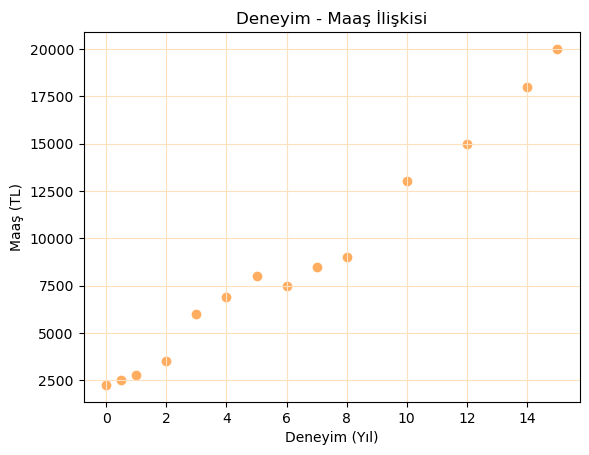

In [10]:
plt.scatter(df.deneyim, df.maas, color="#ffad60")
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim - Maaş İlişkisi")
plt.grid(True, color="#ffe0bd")
plt.show()

In [68]:
lr = LinearRegression()

x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

lr.fit(x,y)

LinearRegression()

In [69]:
# y eksenini kestiği nokta intercept bulunması
y_ekseni_kesisim = np.array([0]).reshape(1,-1)
bƟ = lr.predict(y_ekseni_kesisim)
bƟ

array([[1663.89519747]])

In [70]:
# y eksenini kestiği nokta (intercept)
bƟ_ = lr.intercept_
bƟ

array([[1663.89519747]])

In [71]:
# eğim (slope) bulunması
b1 = lr.coef_
b1

array([[1138.34819698]])

In [73]:
# maas = 1663 + (1138 * deneyim)
# y eksenini kestiği nokta ve eğime göre doğrusal model oluşturulur

deneyim = 11

# 11 yıllık deneyime sahip birinin maaşı tahmin edilir
maas_yeni = 1663 + (1138 * deneyim)
print(maas_yeni)

# 11 yıllık deneyime sahip birinin maaşı predict metodu ile tahmin edilir
sonuc = lr.predict(np.array([deneyim]).reshape(1,-1))
print("11 yıllık deneyime sahip birinin maaşı: {} TL".format(sonuc[0]))

14181
11 yıllık deneyime sahip birinin maaşı: [14185.72536421] TL


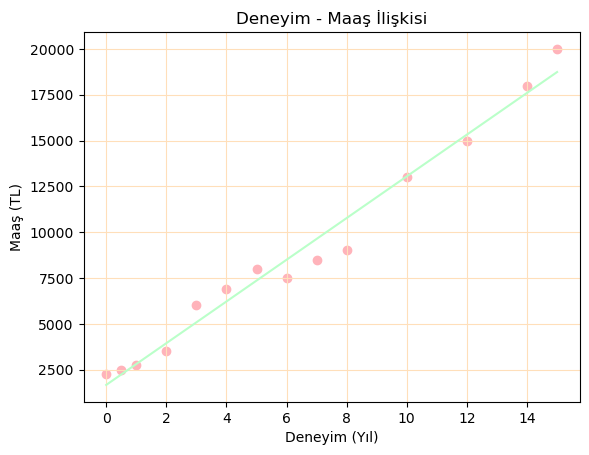

In [74]:
# Doğrusal regresyon modeli ile test/tahmin/görselleştirme
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)

plt.figure()
plt.scatter(x, y, color = "#ffb3ba")

# 0-15 yılları arasında deneyime sahip insanların maaşı tahmin edilir
y_head = lr.predict(array)

plt.plot(array, y_head, color = "#baffc9")
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim - Maaş İlişkisi")
plt.grid(True, color = "#ffdfba")
plt.show()

## 2) Çoklu Doğrusal Regresyon

* Basit doğrusal regresyondan farklı olarak, ikiden fazla değişken arasındaki ilişkiyi tanımlamak için kullanılan bir modelin yaklaşımıdır.

In [30]:
df2 = pd.read_csv("coklu_dogrusal_regresyon_veriseti_20220209.csv", sep=";")

In [31]:
df2.head()

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [33]:
x = df2.iloc[:,[0,2]].values
x

array([[ 0.5, 22. ],
       [ 0. , 21. ],
       [ 1. , 23. ],
       [ 5. , 25. ],
       [ 8. , 28. ],
       [ 4. , 23. ],
       [15. , 35. ],
       [ 7. , 29. ],
       [ 3. , 22. ],
       [ 2. , 23. ],
       [12. , 32. ],
       [10. , 30. ],
       [14. , 34. ],
       [ 6. , 27. ]])

In [34]:
y = df2.maas.values.reshape(-1,1)
y

array([[ 2500],
       [ 2250],
       [ 2750],
       [ 8000],
       [ 9000],
       [ 6900],
       [20000],
       [ 8500],
       [ 6000],
       [ 3500],
       [15000],
       [13000],
       [18000],
       [ 7500]], dtype=int64)

In [35]:
cdr = LinearRegression()
cdr.fit(x,y)

LinearRegression()

In [37]:
test_verisi1 = np.array([[10,35]]) # deneyim=10 ve yaş=35
test_sonucu1 = cdr.predict(test_verisi1)
test_sonucu1

array([[11046.35815877]])

In [39]:
test_verisi2 = np.array([[5,35]]) # deneyim=5 ve yaş=35
test_sonucu2 = cdr.predict(test_verisi2)
test_sonucu2

array([[3418.85455609]])

## Polinomsal Regresyon

* Değişkenler arasındaki ilişki doğrusal olmadığı durumlarda başvurulan analiz metodudur.

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
df3 = pd.read_csv("polinomsal_regresyon_veriseti_20220209.csv", sep=";")

In [42]:
df3.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [54]:
y = df3.araba_max_hiz.values.reshape(-1,1)
x = df3.araba_fiyat.values.reshape(-1,1)

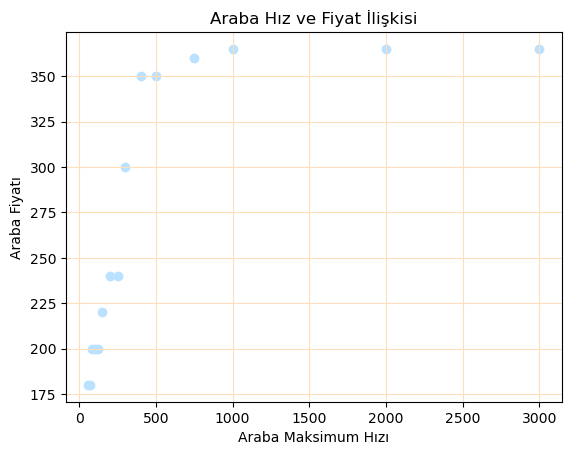

In [46]:
plt.scatter(x, y, color = "#bae1ff")
plt.xlabel("Araba Maksimum Hızı")
plt.ylabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True, color = "#ffdfba")
plt.show()

In [55]:
lr_ = LinearRegression()
lr_.fit(x,y)

LinearRegression()

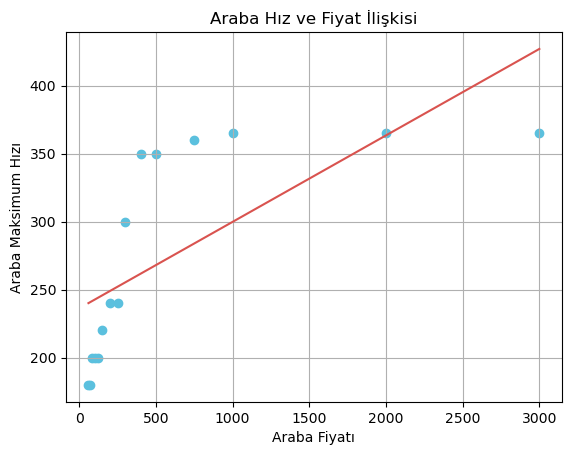

In [57]:
y_tahmin = lr_.predict(x)

plt.scatter(x, y, color = "#5bc0de")
plt.plot(x, y_tahmin, color = "#d9534f")
plt.ylabel("Araba Maksimum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

In [58]:
pr = PolynomialFeatures(degree=4)

x_polinom = pr.fit_transform(x)

In [60]:
lr2 = LinearRegression()
lr2.fit(x_polinom, y)

LinearRegression()

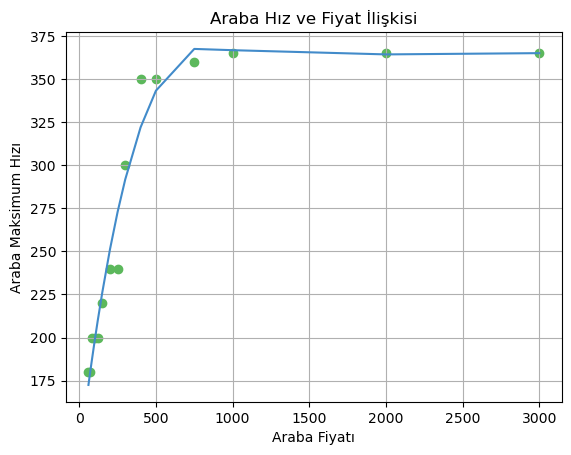

In [64]:
y_tahmin2 = lr2.predict(x_polinom)

plt.scatter(x, y, color = "#5cb85c")
plt.plot(x, y_tahmin2, color = "#428bca")
plt.ylabel("Araba Maksimum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

## Regresyon Modellerinin Değerlendirilmesi

#### R Kare Nedir?
* R kare (R2), regresyonda en yaygın olarak bilinen değerlendirme ölçütlerinden biridir.
* R kare, regresyon denklemi ile belirlenen bağımlı değişkenlerin toplam değişkenliğe oranıdır.
* R karenin en yaygın yorumu, regresyon modelinin gözlemlenen verilere ne kadar iyi uyduğudur. Örneğin, %60'lık bir R kare, verilerin %60'ının regresyon modeline uyduğunu ortaya koymaktadır. Genellikle, daha yüksek bir R kare, model için daha iyi bir uyumu gösterir.

In [66]:
from sklearn.metrics import r2_score